### Capstone project _Loan status prediction _Shilpa S

### 1. Objective

Finance company deals in different kinds of loans including home loans. 
They have presence across all urban, semi-urban and rural areas. 
The customer first applies for a home loan and after that, the company validates the loan applicant's eligibility for the loan.

The company wants to automate the loan eligibility process based on details provided by the applicant while filling out online application forms.It includes details of Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History.

Problem Statement:Loan status prediction-To predict whether the loan applicant may default the loan or not.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set()
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\shilp\\Downloads\\loan_data_set.csv')
print("Top 5 rows from the data: ")
data.head()

Top 5 rows from the data: 


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

### 2. Scope
#### A. Exploratory Data Analysis

###  Features of dataset

In [3]:
# creating a function which will give us features from the dataset
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
    
data_feature(data)

SHAPE OF THE DATA: 
(614, 13)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1)

Observations:

#The dimension of the data is 614*13.
#Our target class  "Loan_Status" is in the form of Binary(i.e., YES or NO, also 0 or 1).
#Data contains some null values.


In [4]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

### B. Univariate Analysis & Data visualization

It is the simplest form of analyzing data where we examine each variable individually. 
*For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. 
*For numerical features, probability density plots can be used to look at the distribution of the variable.

In [5]:
# Analyzing the target variable
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
# Let's normalize and check the proportion
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

422 loan requests has been approved out of 614 where percentage of approval is (69%)

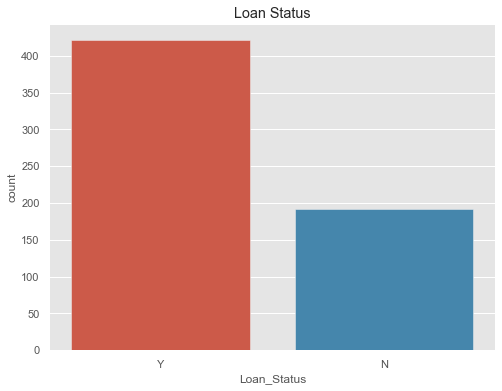

In [7]:
# Representing each category using visualization
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status')
plt.show()

##Visualizing each variable
#Different types of variables in the dataset are Categorical, ordinal and numerical.
1.Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

2.Ordinal features: Ordinal features have some order involved (Dependents, Education, Property_Area)

3.Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

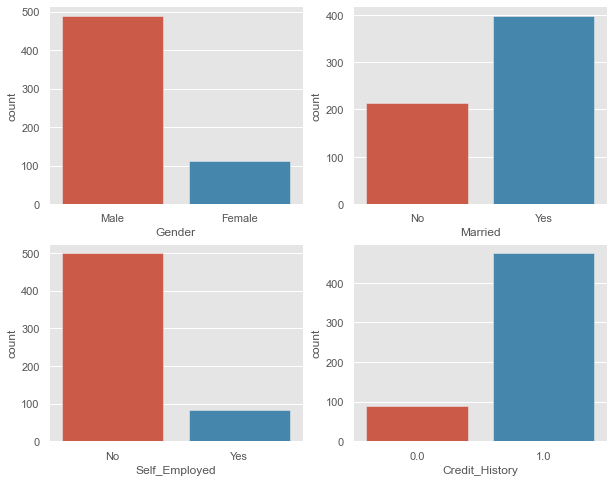

In [8]:
# Analyzing independent variable (Categorical)

plt.figure(figsize=(10,8))
plt.subplot(221)
sns.countplot(x='Gender',data=data)
# plt.title('Gender')
plt.subplot(222)
sns.countplot(x='Married',data=data)
# plt.title('Married')
plt.subplot(223)
sns.countplot(x='Self_Employed',data=data)
# plt.title('Self_Employed')
plt.subplot(224)
sns.countplot(x='Credit_History',data=data)
# plt.title('Credit_History')
plt.show()

Observations from above plots:¶
#Nearly 80% of the applicants in the dataset are Male.
#Nearly 65% of the applicants in the dataset are Married.
#Nearly 15% of the applicants in the dataset are Self Employed.
#Nearly 85% of the applicants have repaid their debts.

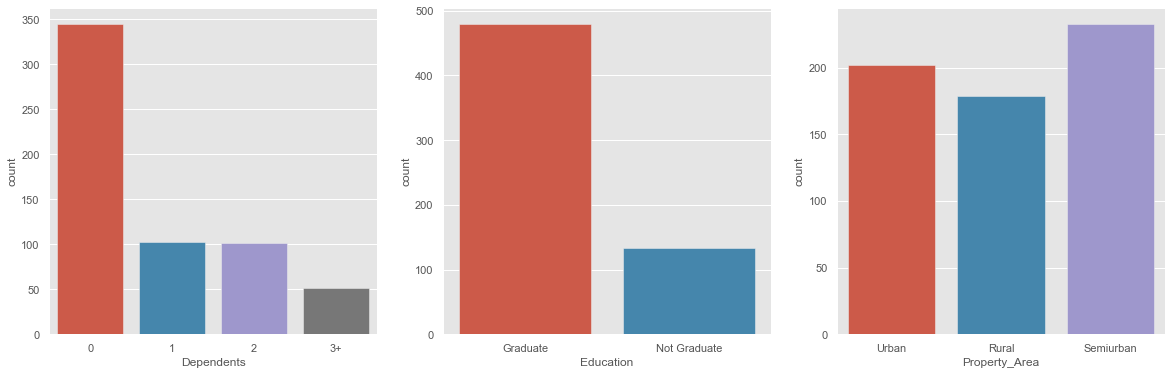

In [9]:
#Analyzing Independent variable (Ordinal)

plt.figure(figsize=(20,6))
plt.figure(num=1)
plt.subplot(131)
sns.countplot(x='Dependents', data=data)
plt.subplot(132)
sns.countplot(x='Education', data=data)
plt.subplot(133)
sns.countplot(x='Property_Area', data=data)
plt.show()

Observations from above barplots are:
#Most of the applicants does not have any dependents.
#Around 80% of the applicants are Graduate.
#Most of the applicants are from Semi-Urban Area

### Numerical Analysis

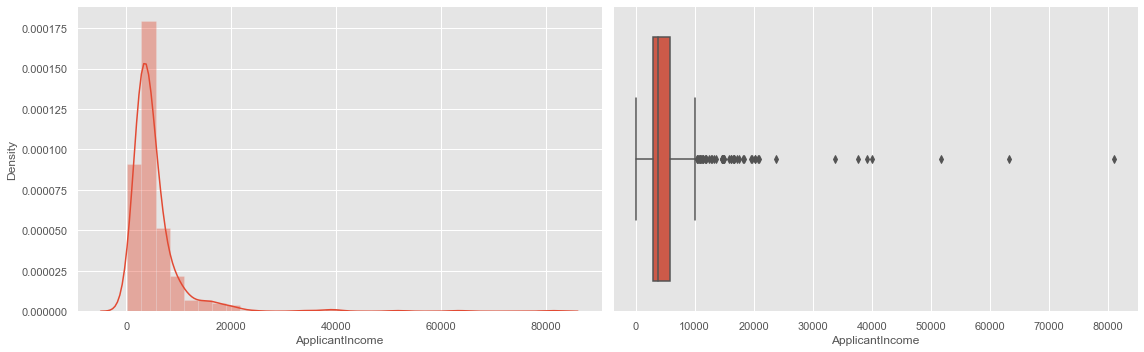

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],bins=30)
plt.subplot(122)
sns.boxplot(data['ApplicantIncome'])
plt.tight_layout()
plt.show()

Observations:
#It can be inferred that most of the data in distribution of applicant income is towards left which means it is not normally distributed. will be normalizing it later as algorithms works better if the data is normally distributed.

#The boxplot confirms the presence of a lot of outliers. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are dealing with people from different education levels.

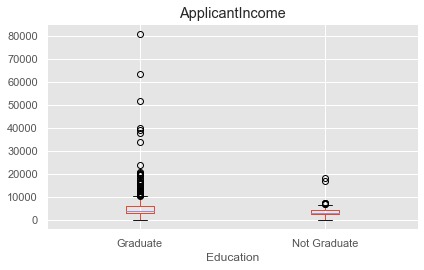

In [11]:
data.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle('')
plt.tight_layout()

#Grauduate people have higher income than those who are Non-Graduate.
Let's see ApplicantIncome factor for Marital Status and Employed type

Text(0.5, 0.98, ' ')

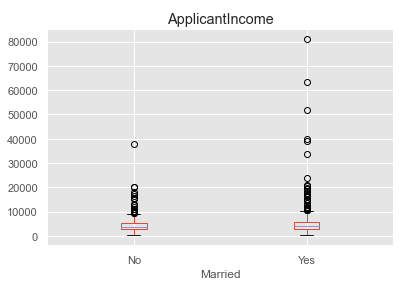

In [12]:
data.boxplot(column='ApplicantIncome', by='Married')
plt.suptitle(' ')

 #Married applicants seems to have larger amount of income.

Text(0.5, 0.98, ' ')

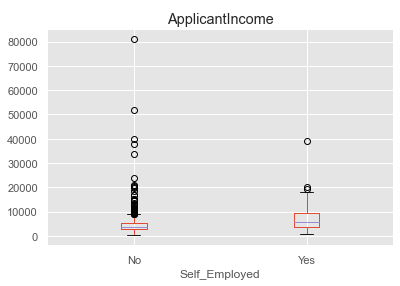

In [13]:
data.boxplot(column='ApplicantIncome', by='Self_Employed')
plt.suptitle(' ')

Observation:
#Those who are Self-employed has lower income amount-range than applicants who are employed.
#Those who are in high income range are also appearnig to be the outliers.

<Figure size 432x288 with 0 Axes>

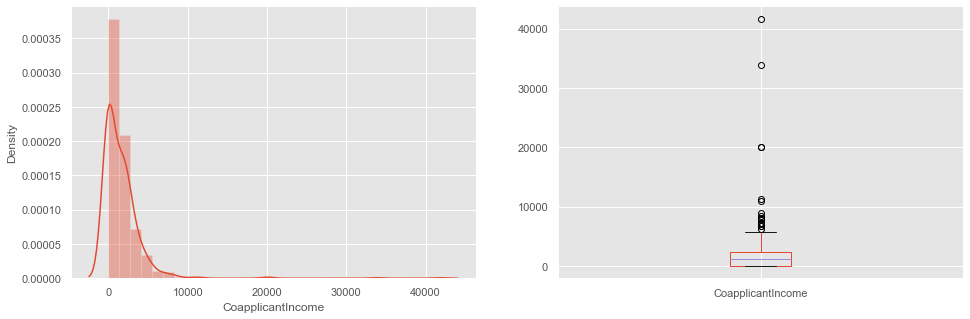

In [14]:
plt.figure(num=1)
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(data['CoapplicantIncome'],bins=30)
plt.subplot(122)
data.boxplot(column='CoapplicantIncome')
plt.show()

#We see a similar distribution as that applicant income. Majority of co-applicant's income ranges from 0 to 50000. 
We also see a lot of outliers in the coapplicant income and it is not normally distributed.

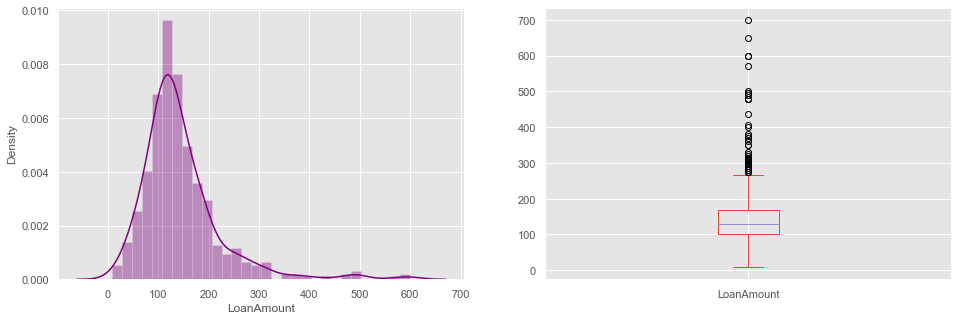

In [15]:
plt.figure(1)
plt.subplot(121)
# For better working it is necessary to drop null values
df = data.dropna()
sns.distplot(df['LoanAmount'],bins=30,color='purple')
plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

#We can see that the the distribution of 'loanAmount' is fairly normal

### PairPlot
A pairs plot is a matrix of scatterplots that lets you understand the pairwise relationship 
between different variables in a dataset.

<Figure size 1296x1008 with 0 Axes>

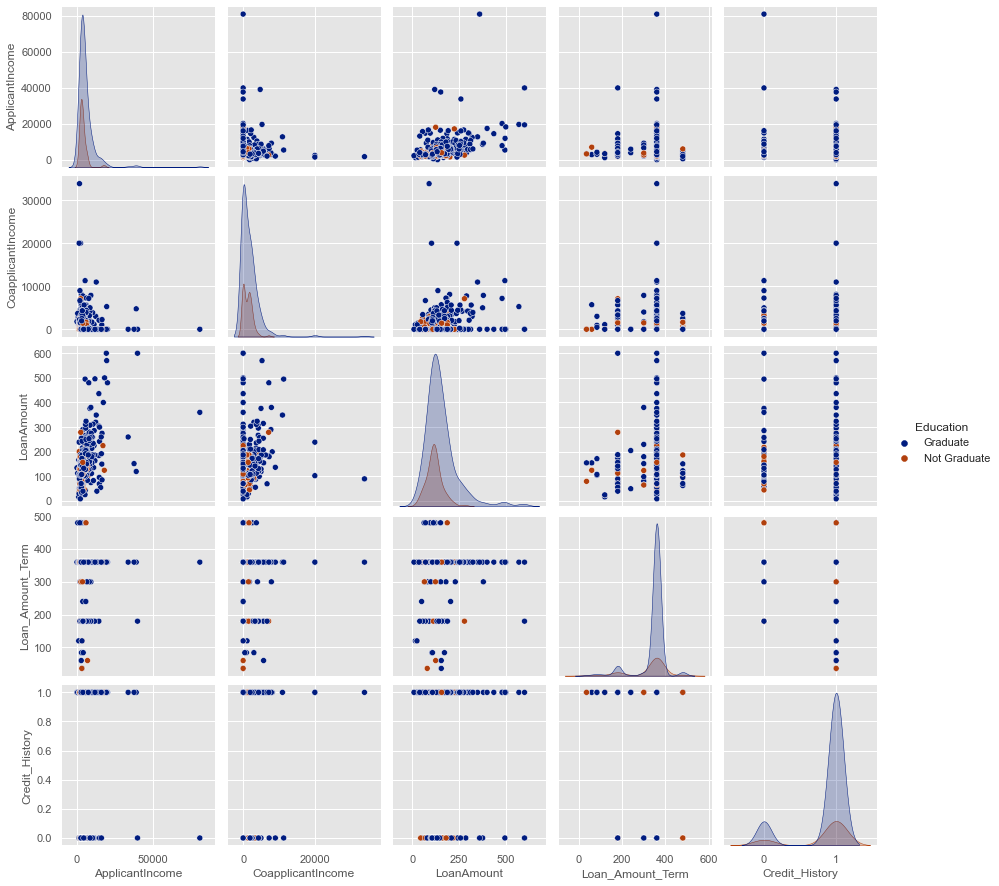

In [16]:
plt.figure(figsize=(18,14))
sns.pairplot(df,hue='Education', palette='dark')

### Bivariate Analysis
After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable, We would like to know how well each feature correlate with our target variable Loan Status.

### Categorical Independent Variable vs Target Variable
First of all we will find the relation between target variable and categorical variables.
Let's look at the stacked bar plot which will give us the proportion of approved and unapproved loans

In [17]:
Gender = pd.crosstab(index=data['Gender'],columns=data['Loan_Status'])
Gender


Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

#Crosstab: A crosstab is a table showing the relationship between two or more variables.
 Where the table only shows the relationship between two categorical variables, a crosstab is also known as a contingency table.

In [18]:
Gender.sum(1).astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

In [19]:
female_Y = round((75/112)*100,2)
print("Percentage of Female applicants whose application is approved: {}%".format(female_Y))

Percentage of Female applicants whose application is approved: 66.96%


In [20]:
male_Y = round((339/489)*100,2)
print("Percentage of Male applicants whose application is approved: {}%".format(male_Y))

Percentage of Male applicants whose application is approved: 69.33%


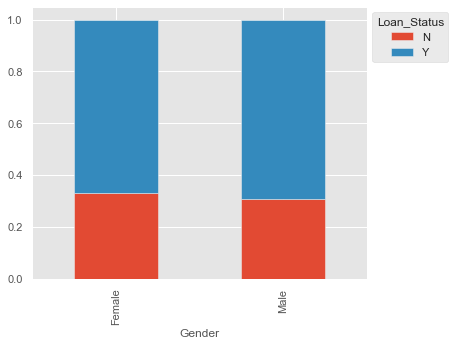

In [21]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,5))
plt.legend(loc = 'upper left',bbox_to_anchor= (1,1),title='Loan_Status')
plt.show()

#It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

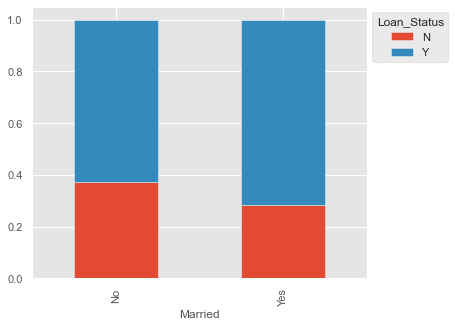

In [22]:
Married=pd.crosstab(data['Married'], data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

Proportion of married applicants is higher for the approved loans

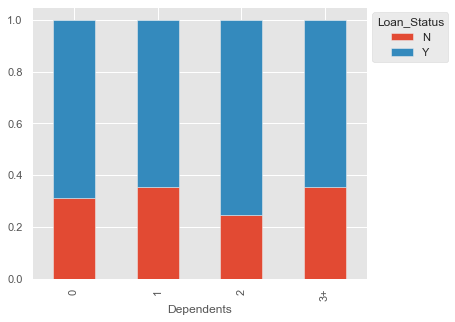

In [23]:
Dependents=pd.crosstab(data['Dependents'], data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left', title='Loan_Status')
plt.show()

#Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status

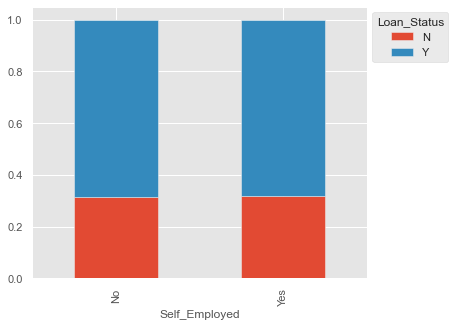

In [24]:
Self_Employed = pd.crosstab(data['Self_Employed'], data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left',title='Loan_Status')
plt.show()

#Employment status does not seems to have affected the loan approval status as the proportion of approval is similar 
in both cases.

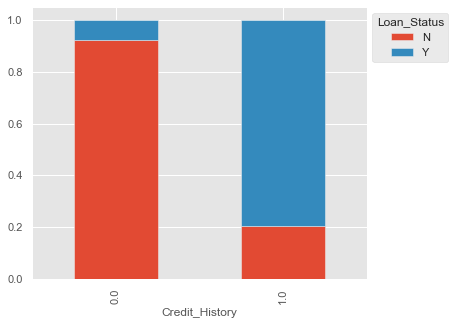

In [25]:
Credit_History = pd.crosstab(data['Credit_History'], data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left',title='Loan_Status')
plt.show()

1. It seems poeple with credit history as 1 are more likely to get their loans approved.¶
2. Good credit history means good repayment capacity

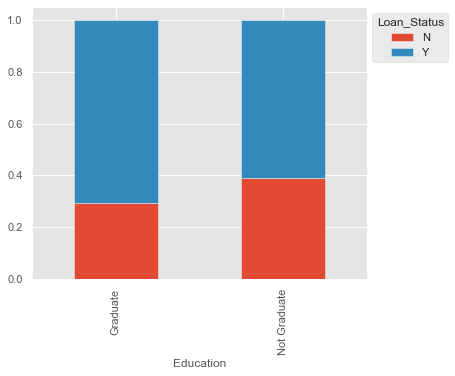

In [26]:
Self_Employed = pd.crosstab(data['Education'], data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, figsize=(6,5))
plt.legend(bbox_to_anchor=(1,1),loc='upper left',title='Loan_Status')
plt.show()

#Proportion of graduate applicants is higher for the approved loans.
One reason can be beccause Graudate applicants fall into the higher income bracket

### Numerical Independent Variable vs Target Variable
#### ApplicantIncome vs Loan_Status
#We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

In [27]:
data.groupby('Loan_Status').mean()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                5446.078125        1877.807292  151.220994        344.064516   
Y                5384.068720        1504.516398  144.294404        341.072464   

             Credit_History  
Loan_Status                  
N                  0.541899  
Y                  0.981818

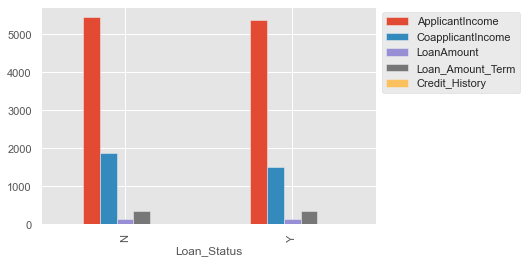

In [28]:
data.groupby('Loan_Status').mean().plot.bar()
plt.legend(bbox_to_anchor=(1,1),loc='upper left')


Let's make bins for the applicant income variable based on the values and analyze the corresponding loan status for each bin.

In [29]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [30]:
bins = [0,2500,4000,6000,8100]
groups = ['Low', 'Average', 'High', 'Very High']

In [31]:
df=data.isna().sum()
df.head() # dataframe without nan values

Loan_ID        0
Gender        13
Married        3
Dependents    15
Education      0
dtype: int64

In [32]:
 # dataframe without nan values
data.isna().sum()
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

#Adding a new column in the name of 'Income groups' by classifying the 'Applicant Income' based on the bins created. 

In [33]:
data['Income_groups'] = pd.cut(data['ApplicantIncome'],bins=bins,labels=groups)

In [34]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status Income_groups  
0             1.0         Urban           Y          High  
1             1.0         Rural           N          High  
2             1.0         Urban           Y       Average  
3             1.0         Urban           Y       Average  
4             1.0         Urban           Y          High

In [35]:
data['Income_groups'].value_counts()

Average      226
High         143
Low          108
Very High     56
Name: Income_groups, dtype: int64

In [36]:
data[['ApplicantIncome', 'Income_groups', 'Loan_Status']].head(n=5)

ApplicantIncome Income_groups Loan_Status
0             5849          High           Y
1             4583          High           N
2             3000       Average           Y
3             2583       Average           Y
4             6000          High           Y

In [37]:
# Pandas Crosstab function drops the NaN values by default
Income_groups = pd.crosstab(index=data['Income_groups'],columns=data['Loan_Status'])
Income_groups

Loan_Status     N    Y
Income_groups         
Low            34   74
Average        67  159
High           45   98
Very High      20   36

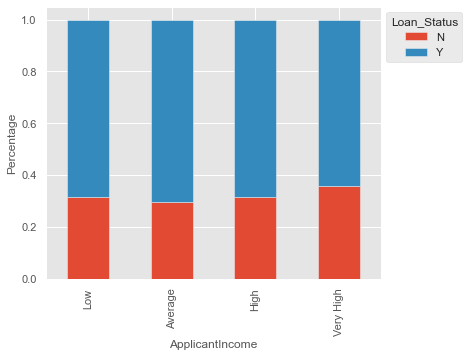

In [38]:
Income_groups.div(Income_groups.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(6,5))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()

We can see that Applicant Income has not affected the loan approval status. The loan approval status has remained almost the same in both categories across all 'Income groups'.
Thus it contradicts the basic notion thata high applicant income means higher the chances of loan approval.

#### Let's check same for the Co-applicant Income.

In [39]:
bins = [0,1000,3000,4200]
groups = ['Low', 'Average', 'High']
data['coapplicant_income_groups'] = pd.cut(data['CoapplicantIncome'],bins,labels=groups)
data['coapplicant_income_groups'].value_counts()

Average    222
High        47
Low         22
Name: coapplicant_income_groups, dtype: int64

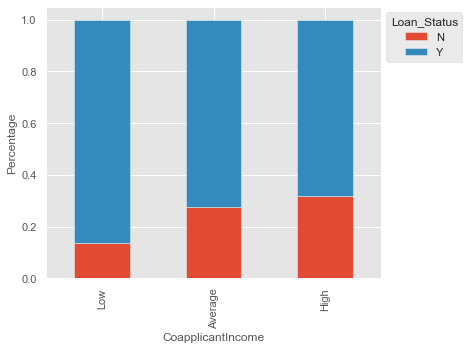

In [40]:
Coapplicant_income_groups = pd.crosstab(index=data['coapplicant_income_groups'],columns=data['Loan_Status'])
Coapplicant_income_groups.div(Coapplicant_income_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()


It shows that if co-applicant's income is less then chances of loan approval is high. But this does not seems right. 
The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it.
So we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

In [41]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

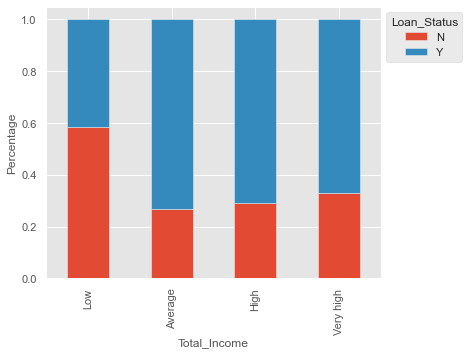

In [42]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
data['Total_Income_groups']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_groups=pd.crosstab(index=data['Total_Income_groups'],columns=data['Loan_Status'])
Total_Income_groups.div(Total_Income_groups.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(6,5))
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.show()


Now it is clear that the proportion of loans getting approved for applicants having low Total_Income is very less 
as compared to that of applicants with Average, High and Very High Income.

#### LoanAmount vs Loan_Status

In [43]:
data['LoanAmount'].isnull().sum()

22

In [44]:
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

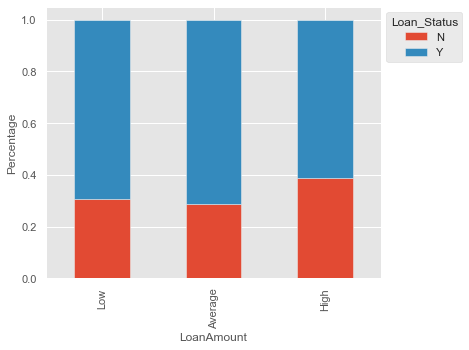

In [45]:
bins=[0,100,200,700]
groups=['Low','Average','High']
data['LoanAmount_groups'] = pd.cut(x=data['LoanAmount'],bins=bins,labels=groups)
LoanAmount_groups = pd.crosstab(index=data['LoanAmount_groups'],columns=data['Loan_Status'])
LoanAmount_groups.div(LoanAmount_groups.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))
plt.legend(loc='upper left',bbox_to_anchor=(1,1),title='Loan_Status')
plt.xlabel('LoanAmount')
p=plt.ylabel('Percentage')
plt.show()

#It can be inferred that the proportions of Loan Approval is higher for the Low & Average Loan amount as compared to higher Loan amount in congruent with the general notion that the chances of loan approval will be high when the loan amount is less.

### Data Cleaning and preparation

In [46]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_groups', 'coapplicant_income_groups', 'Total_Income',
       'Total_Income_groups', 'LoanAmount_groups'],
      dtype='object')

In [47]:
data = data.drop(labels=['Income_groups', 'coapplicant_income_groups','Total_Income','Total_Income_groups','LoanAmount_groups'],axis=1)

In [48]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

Changing  the values '3+' in 'Dependents' variable to 3 to make it a numerical variable. 
We will make this change in both train and test sets

In [49]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [50]:
data['Dependents'].replace('3+',3,inplace=True)

In [51]:
data['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

#### We will convert target variable's ('Loan Status') categories into 0 and 1 so that we can find its correlation with numerical varibales.
will replace N with 0 and Y with 1.

In [52]:
data['Loan_Status'].replace('N',0,inplace=True)
data['Loan_Status'].replace('Y',1,inplace=True)

In [53]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [54]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

#### Correlation between all the Numeric Variables
Heatmap is used to visualize the correlation

In [55]:
data.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   
Loan_Status              -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.045306       -0.014715    -0.004710  
CoapplicantIncome         -0.059878       -0.002056    -0.059187  
LoanAmount                 0.039447       -0.008433    -0.037318  
Loan_Amount_Term           1.000000        0.001470    -0.021268  
Credit_History             0.001470        1.000000     0.561678  
Loan_Status               -0.021268        0.561678     1.000000

<AxesSubplot:>

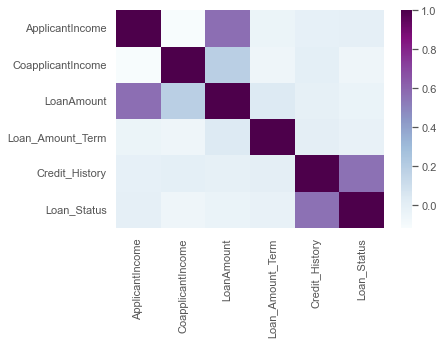

In [56]:
sns.heatmap(data=data.corr(), square=False,cmap='BuPu')

It can be inferred that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is found to be correlated with CoapplicantIncome.
We can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

In [57]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in many columns.considering the following methods to fill the missing values

#1. For numerical variables: imputation using mean or median
#2. For categorical variables: imputation using mode 

In [58]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [59]:
data['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [60]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [61]:
data['Gender'].mode()[0]

'Male'

In [62]:
# imputinig the missing values using the mode of gender feature
data['Gender'].fillna(value=data['Gender'].mode()[0],inplace=True)

In [63]:
# after imputation
data['Gender'].isnull().sum()

0

In [64]:
# check the value_counts and unique count
data['Gender'].describe()

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

#### Similarly we impute missing values with mode for others

In [65]:
data['Married'].fillna(data['Married'].mode()[0],inplace= True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace= True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace= True)

Although the credit_history is a numeric feature but the values in it are binary (1 or 0), so we will use the "mode" to impute these values

In [66]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [67]:
data['Credit_History'].mode()[0]

1.0

In [68]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

#### Now we wil impute the missing values for the numeric features 'LoanAmount'and 'Loan_Amount_Term'.

In [69]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

We can seen that the value of 360 is repeating the most in Loan_Amount_Term variable, so we will use the mode of this variable to replace the missing values

In [71]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [72]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

#### We can see that the 'LoanAmount' feature is highly affected by the presence of lot of outliers, so replacing the missing values by the mean() of the feature will not be the correct approach here.
#### Thus to impute these missing values we will use the median() of the feature

In [73]:
data['LoanAmount'].median()

128.0

In [74]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [75]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
 data.to_csv('C:\\Users\\shilp\\Downloads\\cleaned_data.csv')

#### Similarly lets clean the test data

In [77]:
test_data = pd.read_csv('C:\\Users\\shilp\\Downloads\\test.csv')

In [78]:
# Quick overview of the data (we made a function for that)
data_feature(test_data)

SHAPE OF THE DATA: 
(367, 13)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         367 non-null    int64  
 1   Loan_ID            367 non-null    object 
 2   Gender             356 non-null    object 
 3   Married            367 non-null    object 
 4   Dependents         357 non-null    object 
 5   Education          367 non-null    object 
 6   Self_Employed      344 non-null    object 
 7   ApplicantIncome    367 non-null    int64  
 8   CoapplicantIncome  367 non-null    int64  
 9   LoanAmount         362 non-null    float64
 10  Loan_Amount_Term   361 non-null    float64
 11  Credit_History     338 non-null    float64
 12  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3)

In [79]:
 data_feature(data)

SHAPE OF THE DATA: 
(614, 13)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2)

In [80]:
# cleaning the test data
test_data['Dependents'].replace('3+',3,inplace=True)
test_data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
test_data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
test_data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
test_data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
test_data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
test_data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)

In [81]:
test_data.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Handling Outliers
Presence of outliers in the data mostly has a significant effect on the mean and standard deviation and thus affects the distribution of the variable.

#### Due to the presence of outliers in the data, bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove is by removing data points more than 90th percentile and less than 10th percentile.

In [82]:
print("10th percentile: ")
print(data['LoanAmount'].quantile(0.10))
print("90th percentile: ")
print(data['LoanAmount'].quantile(0.90))

10th percentile: 
72.30000000000001
90th percentile: 
229.4000000000001


From above percentiles (10 & 90) we can remove data points those are out of this range but there may not outliers under 10th percentile.
So lets remove outliers those are greater than 90th percentile and plot a boxplot so we can see if there are any outliers less than 10th percentile.

After removing outliers >90th percentile: 
Detecting Outilers:
 


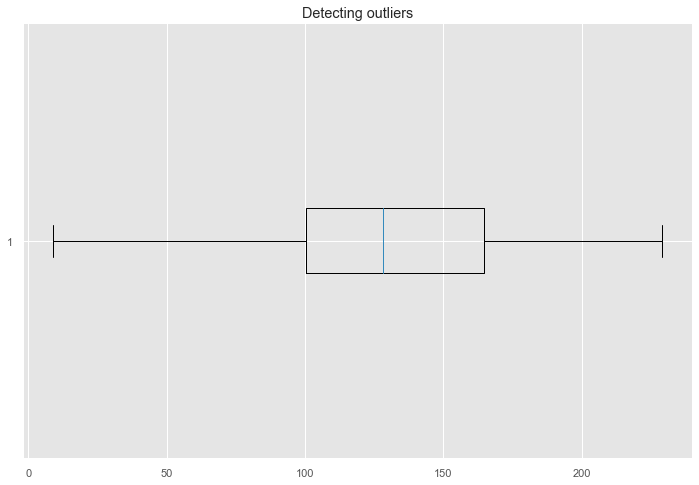

In [83]:
data['LoanAmount'] = np.where(data['LoanAmount']>229.0, 229.0, data['LoanAmount'])

def box_plot(df):
    print("Detecting Outilers:\n ")
    plt.figure(figsize=(12,8))
    plt.boxplot(df, vert=False)
    plt.title("Detecting outliers")
    plt.show()

print("After removing outliers >90th percentile: ")
box_plot(data['LoanAmount']) 

<AxesSubplot:>

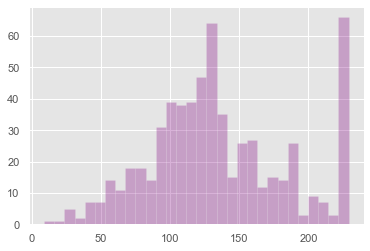

In [84]:
data['LoanAmount'].hist(bins=30, color='purple',alpha=0.3)

After removing outliers (i.e. datapoints greater than 90th percentile) it looks better and there is no much extreme points.

In [85]:
# Similar for test dataset
print("10th percentile: ")
print(test_data['LoanAmount'].quantile(0.10))
print("90th percentile: ")
print(test_data['LoanAmount'].quantile(0.90))

10th percentile: 
77.6
90th percentile: 
194.00000000000017


After removing outliers >90th percentile:
Detecting Outilers:
 


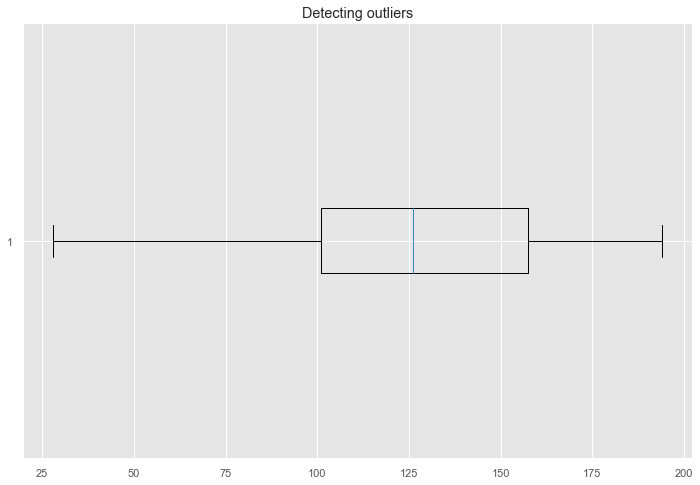

In [86]:
test_data['LoanAmount'] = np.where(test_data['LoanAmount']>194.0, 194.0, test_data['LoanAmount'])

print("After removing outliers >90th percentile:")
box_plot(test_data['LoanAmount'])

<AxesSubplot:>

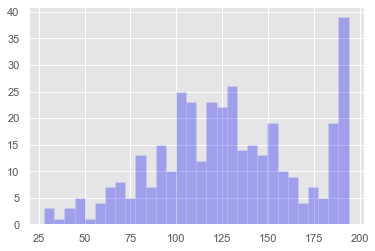

In [87]:
test_data['LoanAmount'].hist(bins=30, color='blue',alpha=0.3)

#### C.Data Pre-processing

Since Loan_ID does not have any significance while the predicting the Loan Approval status, will drop the Loan_ID from both the train and test datasets

In [88]:
train = data.drop('Loan_ID',axis=1)
test = test_data.drop('Loan_ID',axis=1)

#### Encoding the Categorical Variables¶
##### Since our train data contains the categorical features - Gender, Married, Education, Self_Employed and Property_Area which have non-numeric data so we need to convert these features into the numeric before further processing as the machine learning algorithm works with numeric data.

In [89]:
train.head(20)

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0     Male      No          0      Graduate            No             5849   
1     Male     Yes          1      Graduate            No             4583   
2     Male     Yes          0      Graduate           Yes             3000   
3     Male     Yes          0  Not Graduate            No             2583   
4     Male      No          0      Graduate            No             6000   
5     Male     Yes          2      Graduate           Yes             5417   
6     Male     Yes          0  Not Graduate            No             2333   
7     Male     Yes          3      Graduate            No             3036   
8     Male     Yes          2      Graduate            No             4006   
9     Male     Yes          1      Graduate            No            12841   
10    Male     Yes          2      Graduate            No             3200   
11    Male     Yes          2      Graduate            No             2500   
12    Male     Yes          2      Graduate            No             3073   
13    Male      No          0      Graduate            No             1853   
14    Male     Yes          2      Graduate            No             1299   
15    Male      No          0      Graduate            No             4950   
16    Male      No          1  Not Graduate            No             3596   
17  Female      No          0      Graduate            No             3510   
18    Male     Yes          0  Not Graduate            No             4887   
19    Male     Yes          0      Graduate            No             2600   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                 0.0       128.0             360.0             1.0   
1              1508.0       128.0             360.0             1.0   
2                 0.0        66.0             360.0             1.0   
3              2358.0       120.0             360.0             1.0   
4                 0.0       141.0             360.0             1.0   
5              4196.0       229.0             360.0             1.0   
6              1516.0        95.0             360.0             1.0   
7              2504.0       158.0             360.0             0.0   
8              1526.0       168.0             360.0             1.0   
9             10968.0       229.0             360.0             1.0   
10              700.0        70.0             360.0             1.0   
11             1840.0       109.0             360.0             1.0   
12             8106.0       200.0             360.0             1.0   
13             2840.0       114.0             360.0             1.0   
14             1086.0        17.0             120.0             1.0   
15                0.0       125.0             360.0             1.0   
16                0.0       100.0             240.0             1.0   
17                0.0        76.0             360.0             0.0   
18                0.0       133.0             360.0             1.0   
19             3500.0       115.0             360.0             1.0   

   Property_Area  Loan_Status  
0          Urban            1  
1          Rural            0  
2          Urban            1  
3          Urban            1  
4          Urban            1  
5          Urban            1  
6          Urban            1  
7      Semiurban            0  
8          Urban            1  
9      Semiurban            0  
10         Urban            1  
11         Urban            1  
12         Urban            1  
13         Rural            0  
14         Urban            1  
15         Urban            1  
16         Urban            1  
17         Urban            0  
18         Rural            0  
19         Urban            1

In [90]:
print(train.isnull().sum())
print("-"*60)
print(train.dtypes)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
------------------------------------------------------------
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


In [91]:
train['Dependents'].dtypes

dtype('O')

In [92]:
# Gender
train['Gender'] = train['Gender'].map({"Male":1, "Female":0})
test['Gender'] = test['Gender'].map({"Male":1, "Female":0})
# Marrital Status
train['Married'] = train['Married'].map({'Yes':1, 'No':0})
test['Married'] = test['Married'].map({'Yes':1, 'No':0})
# Dependents
train['Dependents'] = train['Dependents'].map({'0':0,'1':1,'2':2})
test['Dependents'] = test['Dependents'].map({'0':0,'1':1,'2':2})
# Education Status
train['Education'] = train['Education'].map({'Graduate':1, 'Not Graduate':0})
test['Education'] = test['Education'].map({'Graduate':1, 'Not Graduate':0})
# Employment Status
train['Self_Employed'] = train['Self_Employed'].map({'Yes':1, 'No':0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1, 'No':0})
#Property Area
train['Property_Area'] = train['Property_Area'].map({'Urban':2, 'Rural':0,'Semiurban':1})
test['Property_Area'] = test['Property_Area'].map({'Urban':2, 'Rural':0,'Semiurban':1})

In [93]:
train.Dependents = train.Dependents.fillna(3)
test.Dependents = test.Dependents.fillna(3)

In [94]:
train.head(30)

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0        1        0         0.0          1              0             5849   
1        1        1         1.0          1              0             4583   
2        1        1         0.0          1              1             3000   
3        1        1         0.0          0              0             2583   
4        1        0         0.0          1              0             6000   
5        1        1         2.0          1              1             5417   
6        1        1         0.0          0              0             2333   
7        1        1         3.0          1              0             3036   
8        1        1         2.0          1              0             4006   
9        1        1         1.0          1              0            12841   
10       1        1         2.0          1              0             3200   
11       1        1         2.0          1              0             2500   
12       1        1         2.0          1              0             3073   
13       1        0         0.0          1              0             1853   
14       1        1         2.0          1              0             1299   
15       1        0         0.0          1              0             4950   
16       1        0         1.0          0              0             3596   
17       0        0         0.0          1              0             3510   
18       1        1         0.0          0              0             4887   
19       1        1         0.0          1              0             2600   
20       1        1         0.0          0              0             7660   
21       1        1         1.0          1              0             5955   
22       1        1         0.0          0              0             2600   
23       1        1         2.0          0              0             3365   
24       1        1         1.0          1              0             3717   
25       1        1         0.0          1              1             9560   
26       1        1         0.0          1              0             2799   
27       1        1         2.0          0              0             4226   
28       1        0         0.0          0              0             1442   
29       0        0         2.0          1              0             3750   

    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                 0.0       128.0             360.0             1.0   
1              1508.0       128.0             360.0             1.0   
2                 0.0        66.0             360.0             1.0   
3              2358.0       120.0             360.0             1.0   
4                 0.0       141.0             360.0             1.0   
5              4196.0       229.0             360.0             1.0   
6              1516.0        95.0             360.0             1.0   
7              2504.0       158.0             360.0             0.0   
8              1526.0       168.0             360.0             1.0   
9             10968.0       229.0             360.0             1.0   
10              700.0        70.0             360.0             1.0   
11             1840.0       109.0             360.0             1.0   
12             8106.0       200.0             360.0             1.0   
13             2840.0       114.0             360.0             1.0   
14             1086.0        17.0             120.0             1.0   
15                0.0       125.0             360.0             1.0   
16                0.0       100.0             240.0             1.0   
17                0.0        76.0             360.0             0.0   
18                0.0       133.0             360.0             1.0   
19             3500.0       115.0             360.0             1.0   
20                0.0       104.0             360.0             0.0   
21             5625.0  

In [95]:
print(train.isnull().sum())
print("-"*60)
print(train.dtypes)
print("-"*60)
print(train['Dependents'].value_counts())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
------------------------------------------------------------
Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object
------------------------------------------------------------
0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64


In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# train['Dependents'] = le.fit_transform(train['Dependents'])
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [97]:
# Independent Variable
X = train.drop('Loan_Status',axis=1)

# Dependent Variable(target)
y= train.Loan_Status

In [98]:
X

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0         0.0          1              0             5849   
1         1        1         1.0          1              0             4583   
2         1        1         0.0          1              1             3000   
3         1        1         0.0          0              0             2583   
4         1        0         0.0          1              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0         0.0          1              0             2900   
610       1        1         3.0          1              0             4106   
611       1        1         1.0          1              0             8072   
612       1        1         2.0          1              0             7583   
613       0        0         0.0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0       128.0             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       229.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

     Property_Area  
0                2  
1                0  
2                2  
3                2  
4                2  
..             ...  
609              0  
610              0  
611              2  
612              2  
613              1  

[614 rows x 11 columns]

In [99]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

#### Splitting the dataset into train and validation sets
 splitting our train dataset into training and validation sets. After training the model on the train part, we use the same model to make predictions for the validation part. The validation set is actually a part of the train dataset, which we will use to validate the prediction results with the actual results.

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((460, 11), (154, 11), (460,), (154,))

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [104]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg =  LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
log_score = cross_val_score(log_reg, X_train, y_train,cv=5)
print("Logistic Regression: ", round(log_score.mean(),2)*100, "% accuracy score")



Logistic Regression:  80.0 % accuracy score


In [105]:
# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
svc_score = cross_val_score(svc, X_train, y_train,cv=5)
print("Support Vector Machine: ", round(svc_score.mean(),2)*100, "% accuracy score")



Support Vector Machine:  67.0 % accuracy score


In [106]:
# KNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = cross_val_score(knn, X_train, y_train,cv=5)
print("KNeighbors: ", round(knn_score.mean(),2)*100, "% accuracy score")


KNeighbors:  65.0 % accuracy score


In [107]:
# Decision Tree
dcTree = DecisionTreeClassifier()
dcTree.fit(X_train, y_train)
dcTree_score = cross_val_score(dcTree, X_train, y_train, cv=5)
print("Decision Tree: ", round(dcTree_score.mean(),2)*100, "% accuracy score")

Decision Tree:  69.0 % accuracy score


In [108]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest: ",  round(rf_score.mean(),2)*100, "% accuracy score")

Random Forest:  78.0 % accuracy score


Logistic Regression:  80.0 % accuracy score
Support Vector Machine:  67.0 % accuracy score
KNeighbors:  65.0 % accuracy score
Decision Tree:  69.0 % accuracy score
Random Forest:  78.0 % accuracy score

In [109]:
# using GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty":['l1','l2'], 'C':[0.001, 0.01, 0.1,1,10,100],'solver':['liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train, y_train)

# Best parameters
log_reg = grid_log_reg.best_params_

print(log_reg)

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [110]:
# KNN
knn_params = {"n_neighbors":[1,3,5], 'algorithm':['auto']}
grid_knn = GridSearchCV(KNeighborsClassifier(),knn_params)
grid_knn.fit(X_train, y_train)
knn = grid_knn.best_params_
print(knn)

{'algorithm': 'auto', 'n_neighbors': 5}


In [111]:
# SVC
svc_params = {'C':[0.5,1], 'kernel':['rbf','sigmoid']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_params_
print(svc)

{'C': 0.5, 'kernel': 'rbf'}


In [112]:
# Decision Tree
tree_params = {'criterion':['gini','entropy'],"max_depth":[2,4,6],"min_samples_leaf":[5,7,9,]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
dcTree = grid_tree.best_params_
print(dcTree)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


In [113]:
# RandomForest
rf_params = {'n_estimators':[100,200,300],'max_features':['auto','sqrt'],"min_samples_leaf":[1,2,4],"bootstrap":[True, False]}
grid_rf = GridSearchCV(RandomForestClassifier(),rf_params)
grid_rf.fit(X_train, y_train)
rf = grid_rf.best_params_
print(rf)

{'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 300}


In [114]:
# To get parameters
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

#Overfitting Case
#classifiers_params = {
#'LogisticRegression': LogisticRegression(C=10, penalty= 'l1', solver= 'liblinear'),
#'SUpport Vector Classifier': SVC(C= 0.5, kernel= 'rbf'),
#'KNeighborsClassifier': KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5),
#'DecisionTreeClassifier': DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 5),
#'RandomForestClassifier': RandomForestClassifier(bootstrap= True, max_features= 'auto', min_samples_leaf= 4, n_estimators= 100)
#}

In [115]:
# Logistic Regression
log_reg =  LogisticRegression(C=10, penalty= 'l1', solver= 'liblinear')
log_reg.fit(X_train, y_train)
log_score = cross_val_score(log_reg, X_train, y_train,cv=5)
print('Logistic Regression: ', round(log_score.mean(),2)*100, "% accuracy score")

# Support Vector Machine
svc = SVC(C= 0.5, kernel= 'rbf', probability=True)
svc.fit(X_train, y_train)
svc_score = cross_val_score(svc, X_train, y_train,cv=5)
print("Support Vector Machine: ", round(svc_score.mean(),2)*100, "% accuracy score")

# KNeighbors
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5)
knn.fit(X_train, y_train)
knn_score = cross_val_score(knn, X_train, y_train,cv=5)
print("KNeighbors: ", round(knn_score.mean(),2)*100, "% accuracy score")

# Decision Tree
dcTree = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 5)
dcTree.fit(X_train, y_train)
dcTree_score = cross_val_score(dcTree, X_train, y_train, cv=5)
print("Decision Tree: ", round(dcTree_score.mean(),2)*100, "% accuracy score")

# Random Forest
rf = RandomForestClassifier(bootstrap= True, max_features= 'sqrt', min_samples_leaf= 4, n_estimators= 100)
rf.fit(X_train, y_train)
rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest: ",  round(rf_score.mean(),2)*100, "% accuracy score")


Logistic Regression:  80.0 % accuracy score
Support Vector Machine:  68.0 % accuracy score
KNeighbors:  65.0 % accuracy score
Decision Tree:  80.0 % accuracy score
Random Forest:  80.0 % accuracy score


Logistic Regression:  80.0 % accuracy score
Support Vector Machine:  68.0 % accuracy score
KNeighbors:  65.0 % accuracy score
Decision Tree:  69.0 % accuracy score
Random Forest:  78.0 % accuracy score

Accuracy scores of all 5 classification algoriths,before and after hyper parameter tuning:¶

LogisticRegression: 80.0 % || after: 80.%

SVC: 67.0 % || after: 68%

KNeighborsClassifier: 65.0 || after: 65.0%

DecisionTreeClassifier: 69.0 % || after: 80.0%

RandomForestClassifier: 78.0 % || after: 80.0%

LogisticRegression has same accuracy(80%) even after tunning.
DecisionTree Classifier improved by 10% after tunning, and RandomForest Classifier got (80%) accuracy.
There is not much improvement in SVC, KNeighborsClassifier.
Still we cannot directly choose them so for a selection we should evaluate all of them and then we will compare the models and select the best one.

### Model evaluation¶
#### Evaluation, comparison and selection

In [116]:
# ROC CURVE and ROC-AUC score
# A receiver/relative operating characteristic curve, commonly known as the ROC curve.

# On Train dataset

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
log_reg_proba = log_reg.predict_proba(X_train) 
svc_proba = svc.predict_proba(X_train)
knn_proba = knn.predict_proba(X_train)
dt_proba = dcTree.predict_proba(X_train)
rf_proba = rf.predict_proba(X_train)



In [117]:
# roc_auc_score
log_reg_auc = round(roc_auc_score(y_train, log_reg_proba[:,1])*100)
svc_auc = round(roc_auc_score(y_train,svc_proba[:,1])*100)
knn_auc = round(roc_auc_score(y_train, knn_proba[:,1])*100)
dt_auc =  round(roc_auc_score(y_train, dt_proba[:,1])*100)
rf_auc = round(roc_auc_score(y_train, rf_proba[:,1])*100)

print("ROC_AUC_SCORE of models on Train Set\n")
print("Logistic Regression: ", log_reg_auc)
print("Support Vector Machine: ", svc_auc)
print("KNeighbors: ",knn_auc)
print("Decision Tree: ",dt_auc)
print("Random Forest: ",rf_auc)



ROC_AUC_SCORE of models on Train Set

Logistic Regression:  77
Support Vector Machine:  40
KNeighbors:  76
Decision Tree:  72
Random Forest:  98


In [118]:
# roc curve for models

fpr1, tpr1, thresh1 = roc_curve(y_train, log_reg_proba[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_train, svc_proba[:,1],pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_train, knn_proba[:,1],pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_train, dt_proba[:,1],pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_train, rf_proba[:,1],pos_label=1)



In [119]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs, pos_label=1)

plt.style.use('seaborn')



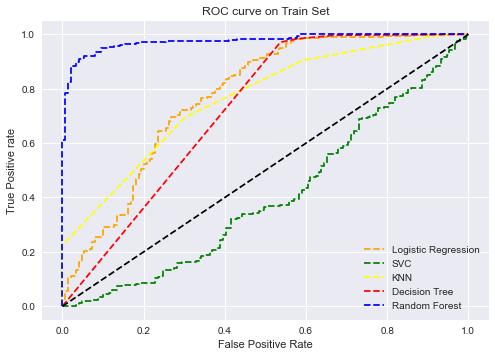

In [120]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='SVC')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve on Train Set')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

ROC_AUC_SCORE of models on Train Set

Logistic Regression:  77
Support Vector Machine:  40
KNeighbors:  76
Decision Tree:  72
Random Forest:  98
    

Observation: From above results, RandomForest, DecisionTree and Logistic Regression looks better, so now we will find the best between them but this time will use our Test Data.

ROC_AUC_SCORE of models on Test Set

Logistic Regression:  74
KNeighbors:  51
Random Forest:  77


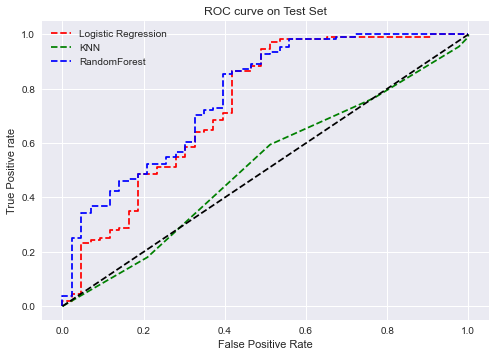

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

log_reg_proba_test = log_reg.predict_proba(X_test) 
knn_proba_test = knn.predict_proba(X_test)
rf_proba_test = rf.predict_proba(X_test)


knn_auc_test = round(roc_auc_score(y_test, knn_proba_test[:,1])*100)
log_reg_auc_test=  round(roc_auc_score(y_test, log_reg_proba_test[:,1])*100)
rf_auc_test = round(roc_auc_score(y_test, rf_proba_test[:,1])*100)

print("ROC_AUC_SCORE of models on Test Set\n")
print("Logistic Regression: ", log_reg_auc_test)
print("KNeighbors: ",knn_auc_test)
print("Random Forest: ", rf_auc_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, log_reg_proba_test[:,1],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_proba_test[:,1],pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf_proba_test[:,1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='RandomForest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve on Test Set')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

ROC_AUC_SCORE of models on Test Set

Logistic Regression:  74
KNeighbors:  51
Random Forest:  80

Observation on test set:
#Random Forest and Logistic Regression are still in the game and leading equally.
#Poor performance by KNN model.
#It is evident from the plot that the AUC for the RandomForest ROC curve is higher than that for the KNN and logistic regression ROC curve. Therefore, it seems that the RandomForest did a better job of classifying the positive class in the dataset.


### Model Selection

#### Well, ROC_AUC curves helped us to eliminate poor performing models. Now we will see Classification Report and Confusion Matrix between the top 2 models and then we will select the best model for further process

In [122]:
log_reg_preds = log_reg.predict(X_test)
rf_preds = rf.predict(X_test)

print("Classification Report of Logisitic Regression: \n", classification_report(y_test, log_reg_preds))
print("-"*70)
print("Classification Report of Random Forest: \n", classification_report(y_test, rf_preds))

Classification Report of Logisitic Regression: 
               precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154

----------------------------------------------------------------------
Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.82      0.97      0.89       111

    accuracy                           0.82       154
   macro avg       0.84      0.71      0.74       154
weighted avg       0.83      0.82      0.80       154



Observation: Precision of the classification reports of both the models is very good but recall is very poor in both reports. Our focus is on Precision than any other factor. 

Why precision > recall?
Precision is the ratio between the True Positives and all the Positives. For our problem statement, that would be the measure of applicants that we correctly identify having a Loan acceptance out of all the applicants predicted having the acceptance. Where recall tells among the applicants who actually have a loan acceptance, how many we correctly identified as having loan acceptance. So aim is to choose the model with higher precision.

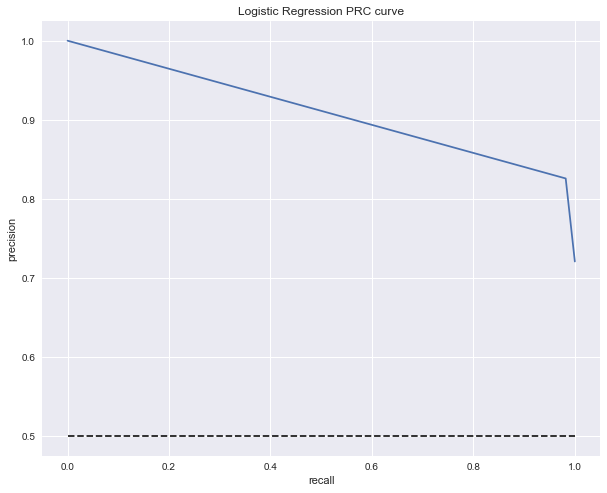

In [123]:
# precision-recall curve
from sklearn.metrics import precision_recall_curve

precision1, recall1, thresholds1 = precision_recall_curve(y_test, log_reg_preds)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, rf_preds)

plt.figure(figsize=(10,8))
plt.plot([0,1],[0.5,0.5],'k--')
plt.plot(recall1, precision1, label='Logistic Regression')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Logistic Regression PRC curve')
plt.show()

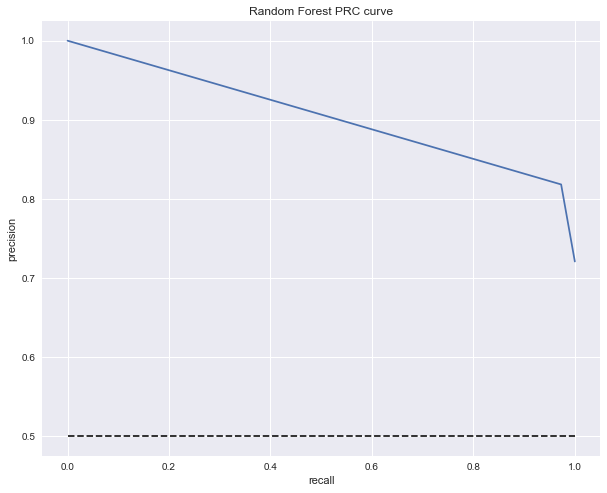

In [124]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0.5,0.5],'k--')
plt.plot(recall2, precision2, label='Random Forest')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Random Forest PRC curve')
plt.show()

Observation: precision-recall curves of both the classifiers looks simiilar.
so finding the confusion matrix.

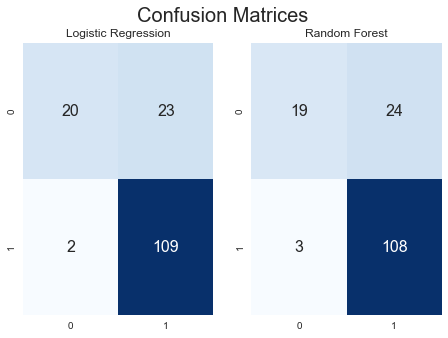

In [125]:
# confusion matrix
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(7.5,5))
plt.suptitle("Confusion Matrices ", fontsize=20)

plt.subplot(1,2,1)
plt.title("Logistic Regression")
sns.heatmap(log_reg_cm,cbar=False, cmap="Blues", annot=True,annot_kws={'size':16},fmt='g')

plt.subplot(1,2,2)
plt.title("Random Forest")
sns.heatmap(rf_cm, cbar=False, cmap="Blues",annot=True, annot_kws={'size':16},fmt='g')

plt.show()

Observation:
True Positive i.e.(1-1) in the confusion matrices of both the model has same value 109 in true positive, actually both are similar but here Logistic Regression has 1 value extra in True Negative. So selecting Logistic Regression model for this problem statement as it seems to better classify the loan applicant rejections.

In [126]:
print("Logistic Regression's confusion matrix evaluation: ")
pd.crosstab(y_test, log_reg_preds, rownames=['Actual'],colnames=['Predicted'], margins=True)

Logistic Regression's confusion matrix evaluation: 


Predicted   0    1  All
Actual                 
0          20   23   43
1           2  109  111
All        22  132  154

### Saving the best model

In [127]:
import pickle
file = 'log_reg.pkl'
pickle.dump(log_reg, open('log_reg.pkl', 'wb'))

In [128]:
### Testing the model

model = open('log_reg.pkl','rb')
model_test = pickle.load(model)

log_reg_test = model_test.score(X_test, y_test)
print(log_reg_test)

0.8376623376623377


In [129]:
pred_log_reg = log_reg.predict(X_test)

In [130]:
pd.DataFrame({"Actual":y_test,"Predicted":pred_log_reg}).to_csv("D:/Dataset/save_example.csv")

### 4.Summary


#Various Supervised ML models including Logistic Regresion, KNN, Random Forest and Decision tree were applied to meet the objective of the study.
#The initial models was rebuilt using the outputs of hyper-paramater tuning. Since it is not preferred to  directly choose the one with the highest accuracy, various metrices were looked into. 
#So for a selection of the ML model that best classifies, evaluated all of them based on ROC CURVE,ROC-AUC scores, Precision and Recall rates in the classification report and Confusion Matrix. 
#Least ROC-AUC scored models in train data were eliminated from further evaluation. Logistic regression and RF classifier topped the ROC-AUC scores  in test dataset too. Whereas the score of KNN was very low. 
#Precision/Positively Predicted Values in  the classification reports of both the choosen models- Logistic regression and RF classifier were respectively 86% and 91%. But recall of both models were very low with less than 50%. The focus was on Precision than on recall. 
#Confusion matrix acted as a last resort in choosing the best classifier.
#Thus picked Logistic Regression model as a solution for this problem statement of loan default status prediction as it seems to better classify the loan applicant default as per True Negativity score.


### 5.Inference

#It is preferred to try out various ML models on the dataset and then choose the one that best answers the problem statement by model evaluation, comparison and selection. 
#Thus Logistic regression model can be made use of for the loan default status prediction by this finance company.
